<a href="https://colab.research.google.com/github/amalMalqahtani/weeks6/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [302]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [303]:
#!pip install opendatasets

In [304]:
#dataset = 'https://www.kaggle.com/datasets/khaledzsa/traffic-dataset'

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'])

In [307]:
df.set_index(['date_time'])

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [308]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [309]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [310]:
df["Year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["Day"] = df["date_time"].dt.day
df["dayofweek"] = df["date_time"].dt.dayofweek
df["hour"] = df["date_time"].dt.hour

In [311]:
df["Year"].unique()

array([2017, 2018, 2016], dtype=int32)

In [312]:
df["month"].unique()

array([ 8,  9, 11,  6,  7,  1, 12,  5,  3,  4,  2, 10], dtype=int32)

In [313]:
df["Day"].unique()

array([27,  6, 25,  9, 26,  3, 10,  7, 19, 24, 28, 20,  1, 14, 15, 29, 11,
        4, 21, 12, 30, 13,  8, 17, 16, 22, 31,  2, 23, 18,  5],
      dtype=int32)

In [314]:
df["dayofweek"].unique()

array([6, 3, 4, 5, 2, 0, 1], dtype=int32)

In [315]:
df["hour"].unique()

array([ 1, 23, 18, 22, 15, 12, 19, 20,  0, 16,  5,  8, 17, 21, 10,  4,  6,
       14,  3,  9, 11,  7, 13,  2], dtype=int32)

In [316]:
df['traffic_volume'].fillna(df['traffic_volume'].mean , inplace=True)

<ipython-input-316-365bddcd19b8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0        1209.0
1        1248.0
2        4602.0
3        2838.0
4        5794.0
          ...  
19995    2723.0
19996    5895.0
19997    1132.0
19998    5525.0
19999    5042.0
Name: traffic_volume, Length: 20000, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['traffic_volume'].fillna(df['traffic_volume'].mean , inplace=True)


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       20000 non-null  object        
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
 8   Year                 20000 non-null  int32         
 9   month                20000 non-null  int32         
 10  Day                  20000 non-null  int32         
 11  dayofweek            20000 non-null  int32         
 12  hour                 20000 non-null  int32         
dtypes: datetime64[ns](1), float64(3

In [318]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,Year,month,Day,dayofweek,hour
count,20000.000000,20000.000000,20000.0,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744,2017.325150,6.288000,15.996950,2.972750,11.389250
min,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00,2017.000000,3.000000,8.000000,1.000000,5.000000
50%,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00,2017.000000,6.000000,16.000000,3.000000,11.000000
75%,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00,2018.000000,9.000000,24.000000,5.000000,17.000000
max,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00,2018.000000,12.000000,31.000000,6.000000,23.000000
std,12.661288,0.398007,0.0,39.647341,NaN,0.603362,3.423163,8.767678,2.014599,6.931821


In [319]:
df['traffic_volume'].value_counts().sum()

20000

In [320]:
df['temp'].value_counts().sum()

20000

In [321]:
df['rain_1h'].value_counts().sum()

20000

In [322]:
df['snow_1h'].value_counts().sum()

20000

In [323]:
df['clouds_all'].value_counts().sum()

20000

In [324]:
df['weather_main'].value_counts().sum()

20000

In [325]:
df['weather_description'].value_counts().sum()

20000

In [326]:
df['date_time'].value_counts().sum()

20000

In [327]:
df.drop_duplicates(inplace=True)

In [328]:
df.duplicated().sum()

0

In [329]:
df.dtypes

,0
traffic_volume,object
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,datetime64[ns]
Year,int32
month,int32


In [330]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,month,Day,dayofweek,hour
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,2017,8,27,6,1
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,2018,9,6,3,23
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,2017,8,25,4,18
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,2017,11,9,3,22
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2017,11,9,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,2018,6,6,2,21
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2017,10,25,2,15
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,2018,3,28,2,23
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,2018,2,12,0,15


In [331]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
Year,0
month,0


In [332]:
df['traffic_volume'].fillna(df['traffic_volume'].mean)

,traffic_volume
0,1209.0
1,1248.0
2,4602.0
3,2838.0
4,5794.0
...,...
19995,2723.0
19996,5895.0
19997,1132.0
19998,5525.0


In [333]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,month,Day,dayofweek,hour
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,2017,8,27,6,1
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,2018,9,6,3,23
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,2017,8,25,4,18
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,2017,11,9,3,22
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2017,11,9,3,15


In [334]:
df['traffic_volume'].dropna(inplace= True)

In [335]:
df["date_time"].min(), df["date_time"].max()

(Timestamp('2016-11-18 15:00:00'), Timestamp('2018-09-30 23:00:00'))

In [336]:
pd.get_dummies(df['traffic_volume'], dtype=int)
df['traffic_volume'].info()

<class 'pandas.core.series.Series'>
Index: 19988 entries, 0 to 19999
Series name: traffic_volume
Non-Null Count  Dtype 
--------------  ----- 
19988 non-null  object
dtypes: object(1)
memory usage: 312.3+ KB


In [413]:
pd.to_numeric('traffic_volume', errors="coerce")

nan

In [415]:
df['traffic_volume']=pd.to_numeric

In [416]:
df['traffic_volume'].info()

<class 'pandas.core.series.Series'>
Index: 19988 entries, 0 to 19999
Series name: traffic_volume
Non-Null Count  Dtype 
--------------  ----- 
19988 non-null  object
dtypes: object(1)
memory usage: 312.3+ KB


In [337]:
df_numerical1 = [['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]
df_categiorical1 = [['weather_main','weather_description']]

In [338]:
df_numerical = df.select_dtypes(include=['int64','float64'])
df_categiorical = df.select_dtypes(exclude=['int64','float64'])
df_numerical.corr()

,temp,rain_1h,snow_1h,clouds_all
temp,1.000000,0.100297,NaN,-0.032706
rain_1h,0.100297,1.000000,NaN,0.074935
snow_1h,NaN,NaN,NaN,NaN
clouds_all,-0.032706,0.074935,NaN,1.000000


In [339]:
df.dropna()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,month,Day,dayofweek,hour
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,2017,8,27,6,1
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,2018,9,6,3,23
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,2017,8,25,4,18
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,2017,11,9,3,22
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2017,11,9,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,2018,6,6,2,21
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2017,10,25,2,15
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,2018,3,28,2,23
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,2018,2,12,0,15


In [420]:
df_numerical.dtypes

,0
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64


In [341]:
df_numerical.describe()

,temp,rain_1h,snow_1h,clouds_all
count,19988.000000,19988.000000,19988.0,19988.000000
mean,281.161855,0.048425,0.0,49.390184
std,12.660808,0.398124,0.0,39.645747
min,243.390000,0.000000,0.0,0.000000
25%,271.950000,0.000000,0.0,1.000000
50%,281.825000,0.000000,0.0,75.000000
75%,291.830000,0.000000,0.0,90.000000
max,310.070000,10.600000,0.0,92.000000


In [342]:
df_numerical.fillna(df.mean)

,temp,rain_1h,snow_1h,clouds_all
0,291.15,0.0,0.0,90
1,286.01,0.0,0.0,1
2,293.69,0.0,0.0,75
3,262.35,0.0,0.0,1
4,267.08,0.0,0.0,5
...,...,...,...,...
19995,296.42,0.0,0.0,40
19996,285.58,0.0,0.0,40
19997,275.30,0.0,0.0,1
19998,260.94,0.0,0.0,75


In [343]:
df_categiorical.fillna(df.mode)

,traffic_volume,weather_main,weather_description,date_time,Year,month,Day,dayofweek,hour
0,1209.0,Mist,mist,2017-08-27 01:00:00,2017,8,27,6,1
1,1248.0,Clear,sky is clear,2018-09-06 23:00:00,2018,9,6,3,23
2,4602.0,Clouds,broken clouds,2017-08-25 18:00:00,2017,8,25,4,18
3,2838.0,Clear,sky is clear,2017-11-09 22:00:00,2017,11,9,3,22
4,5794.0,Clear,sky is clear,2017-11-09 15:00:00,2017,11,9,3,15
...,...,...,...,...,...,...,...,...,...
19995,2723.0,Clouds,scattered clouds,2018-06-06 21:00:00,2018,6,6,2,21
19996,5895.0,Clouds,scattered clouds,2017-10-25 15:00:00,2017,10,25,2,15
19997,1132.0,Clear,sky is clear,2018-03-28 23:00:00,2018,3,28,2,23
19998,5525.0,Clouds,broken clouds,2018-02-12 15:00:00,2018,2,12,0,15


In [344]:
df_numerical.isnull().sum()

,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0


In [345]:
df_categiorical.isnull().sum()

,0
traffic_volume,0
weather_main,0
weather_description,0
date_time,0
Year,0
month,0
Day,0
dayofweek,0
hour,0


In [423]:
df["traffic_volume"].info()

<class 'pandas.core.series.Series'>
Index: 19988 entries, 0 to 19999
Series name: traffic_volume
Non-Null Count  Dtype 
--------------  ----- 
19988 non-null  object
dtypes: object(1)
memory usage: 312.3+ KB


In [430]:
df["traffic_volume"] = df["traffic_volume"].astype("int64")

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'function'

In [346]:
df['traffic_volume'].info()

<class 'pandas.core.series.Series'>
Index: 19988 entries, 0 to 19999
Series name: traffic_volume
Non-Null Count  Dtype 
--------------  ----- 
19988 non-null  object
dtypes: object(1)
memory usage: 312.3+ KB


In [347]:
df['traffic_volume'].dtype == object

True

In [348]:
df['traffic_volume'] = np.dtype(np.int32)

In [349]:
df['traffic_volume'].astype == 'int'

False

In [350]:
df_numerical.corr()

,temp,rain_1h,snow_1h,clouds_all
temp,1.000000,0.100297,NaN,-0.032706
rain_1h,0.100297,1.000000,NaN,0.074935
snow_1h,NaN,NaN,NaN,NaN
clouds_all,-0.032706,0.074935,NaN,1.000000


In [421]:
df.astype("float32").dtypes

ValueError: could not convert string to float: 'Mist'

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
import seaborn as sns
sns.pairplot(df, diag_kind="kde", corner=True)

<Axes: >

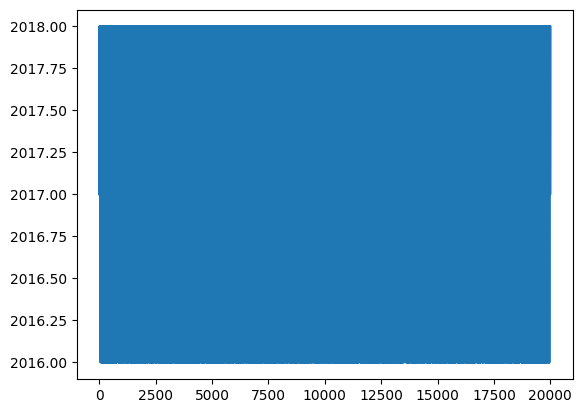

In [351]:
df["date_time"].dt.year.plot()

In [352]:
#fig, axs = plt.subplots(figsize=(12, 4))
#df.groupby(df["date_time"].dt.year)["traffic_volume"].mean().plot(kind='bar', rot=0, ax=axs)

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [357]:
Hour1 = df['hour'].shift(1)
Hour2 = df['hour'].shift(2)

,hour
0,NaN
1,1.0
2,23.0
3,18.0
4,22.0
...,...
19995,7.0
19996,21.0
19997,15.0
19998,23.0


In [387]:
df['clouds_all'].drop

<bound method Series.drop of 0        90
1         1
2        75
3         1
4         5
         ..
19995    40
19996    40
19997     1
19998    75
19999    40
Name: clouds_all, Length: 19988, dtype: int64>

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [388]:
from sklearn.model_selection import train_test_split

target_name = "traffic_volume"
X_train = df.drop(columns=target_name),
y_train = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [432]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [433]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Clouds'

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [379]:
import keras
from keras import layers
from keras import ops

model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
x = ops.ones((3, 3))
y = model(x)
model.add(layers.Dense(64, activation=activations.relu))

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [450]:
from keras.layers import LSTM ,SimpleRNN ,Dense , Activation

In [451]:
keras.layers.SimpleRNN(
    units,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    seed=None)


NameError: name 'units' is not defined

In [374]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (3, 2)                      │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (3, 3)                      │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (3, 4)                      │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [456]:
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)


NameError: name 'Model' is not defined

In [452]:
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [453]:
model = keras.models.Sequential([keras.layers.Dense(10)])

In [454]:
model.compile(keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
history

In [455]:
len(history.history['loss'])

4

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
x_test, y = next(test_dataset.as_numpy_iterator())
y_pred = model.predict(x_test)
plt.figure(figsize=(18, 6))
plt.plot(y[:, 0, 0])
plt.plot(y_pred[:, 0, 0])
plt.legend(["actual", "forecast"])

naive_mse, model_mse = (
    np.square(x_test[:, -1, :, 0] - y[:, 0, :]).mean(),
    np.square(y_pred[:, 0, :] - y[:, 0, :]).mean(),
)
print(f"naive MAE: {naive_mse}, model MAE: {model_mse}")


In [ ]:
x_test, y = next(test_dataset.as_numpy_iterator())
y_pred = model.predict(x_test)
plt.figure(figsize=(18, 6))
plt.plot(y[:, 0, 0])
plt.plot(y_pred[:, 0, 0])
plt.legend(["actual", "forecast"])

naive_mse, model_mse = (
    np.square(x_test[:, -1, :, 0] - y[:, 0, :]).mean(),
    np.square(y_pred[:, 0, :] - y[:, 0, :]).mean(),
)
print(f"naive MAE: {naive_mse}, model MAE: {model_mse}")

In [ ]:
Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [447]:
keras.layers.LSTM(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    seed=None,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    use_cudnn="auto",
    **kwargs
)


NameError: name 'kwargs' is not defined

In [448]:
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)


NameError: name 'Model' is not defined

In [443]:
Model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False)

NameError: name 'Model' is not defined

In [441]:
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)
model = keras.models.Sequential([keras.layers.Dense(10)])
model.compile(keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

4

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
x_test, y = next(test_dataset.as_numpy_iterator())
y_pred = model.predict(x_test)
plt.figure(figsize=(18, 6))
plt.plot(y[:, 0, 0])
plt.plot(y_pred[:, 0, 0])
plt.legend(["actual", "forecast"])

naive_mse, model_mse = (
    np.square(x_test[:, -1, :, 0] - y[:, 0, :]).mean(),
    np.square(y_pred[:, 0, :] - y[:, 0, :]).mean(),
)
print(f"naive MAE: {naive_mse}, model MAE: {model_mse}")


In [ ]:
Model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False,
    **kwargs
)


In [ ]:
Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: